In [1]:
import pandas as pd
import numpy as np
import shmapy

In [2]:
states = pd.DataFrame(pd.read_csv('../static/demo_input1.csv')['state'])
states['values'] = np.random.random(states.shape[0])
states.head()

,state,values
0,AK,0.426400
1,AL,0.351656
2,AR,0.978010
3,AZ,0.544271
4,CA,0.998125


0.05872802800661969 HI
0.9870253037057095 FL
0.692855391955399 TX
0.2056379437576038 GA
0.4925146315739717 NM
0.346275190818605 OK
0.0904758166912717 LA
0.9188673547019397 MS
0.3516564603987653 AL
0.852190139750885 SC
0.998125059703063 CA
0.5442708772539554 AZ
0.8517204927021328 UT
0.2029759367496704 KS
0.9780099935537816 AR
0.8858303465860626 TN
0.6195781377845657 VA
0.13675904472604228 NC
0.9932301573980663 DC
0.7951533072110291 OR
0.5486515287075273 NV
0.25981073233836893 CO
0.8554290079794598 NE
0.4675501556046786 MO
0.1884478464646494 KY
0.27192551982061886 WV
0.018337257122125528 MD
0.9580973818691888 DE
0.02314106372749125 ID
0.6892821783210421 WY
0.05756264950121448 SD
0.921719243055345 IA
0.6750294065070589 IL
0.92679535893193 IN
0.9834874907760229 OH
0.6652635024110365 PA
0.40091702145857333 NJ
0.6730009673411859 CT
0.4142066568311723 WA
0.18128554690834509 MT
0.15092414746545246 ND
0.6014696410862566 MN
0.4347632381613181 WI
0.9524982353411838 MI
0.27066427755989 NY
0.386521

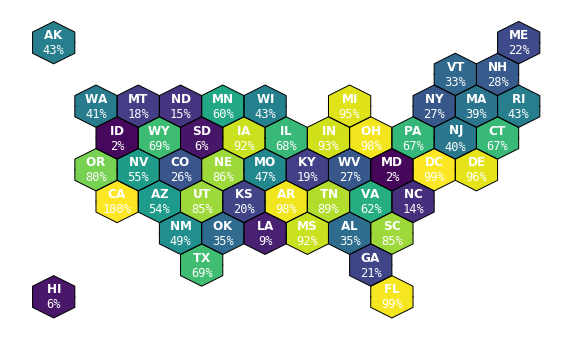

In [3]:
shmapy.us_plot_hex(
    states, 
    chart_type='choropleth', 
    numeric_labels='all',
    line_color='black',
    figsize=(10,6),
    size=12
)

In [4]:
states['category'] = np.random.choice(['Apple', 'Cherry' ,'Banana', 'Durian'], states.shape[0])
states.head()
states['values_label'] = np.round(states['values']*100).astype(int).astype(str) + '%'
states.head()

,state,values,category,values_label
0,AK,0.426400,Durian,43%
1,AL,0.351656,Cherry,35%
2,AR,0.978010,Cherry,98%
3,AZ,0.544271,Durian,54%
4,CA,0.998125,Apple,100%


#118ab2 HI


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

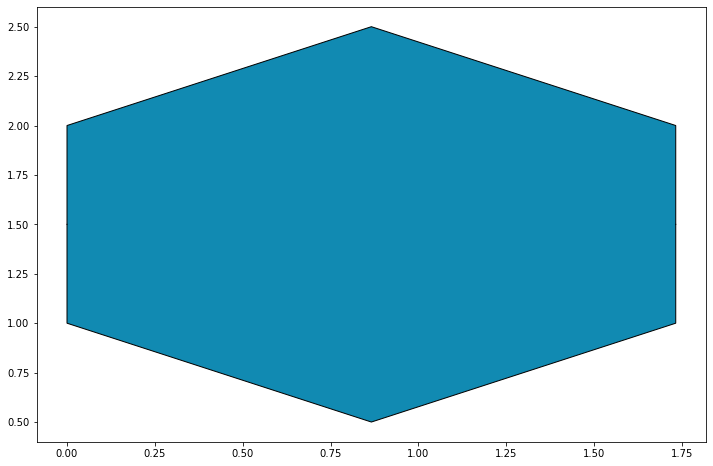

In [5]:
shmapy.us_plot_hex(
    states[['state', 'category', 'values_label']], 
    size = 20, 
    chart_type='categorical', 
    line_color='black', 
    numeric_labels_custom='values_label',
    figsize=(12, 8)
)

In [ ]:
states = pd.DataFrame(pd.read_csv('../static/demo_input4.csv')['state'])
states['values'] = np.random.random(states.shape[0])

shmapy.us_plot_hex(
    states, 
    chart_type='choropleth', 
    numeric_labels='all',
    line_color='black',
    missing_kwargs={'missing_text_color': 'pink', 'missing_fill_color':'blue'},
#     text_color='black',
    figsize=(10,6),
    size=12
)

In [ ]:
np.nan == True

In [7]:
pd.isna(None)

True